In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:

from src.dsets import getCandidateInfoList, LunaDataset

candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)
candidateInfo_list[0]

CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))

In [9]:
from src.vis import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples()

2024-05-31 22:27:01,832 INFO     pid:408 src.dsets:269:__init__ <src.dsets.LunaDataset object at 0x00000207F21D7A90>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=4.991565057, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.163994693532965040247348251579', center_xyz=(-125.99, -9.99, -174.94))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.173106154739244262091404659845', center_xyz=(-47.25, 72.47, -99.37))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=15.13080337, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.897684031374557757145405000951', center_xyz=(-104.3519492, 142.8206767, -709.80419185))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.7832325, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.202811684116768680758082619196', center_xyz=(-82.79150362, -21.43587141, -97.18427459))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=6.334194889, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.119209873306155771318545953948', center_xyz=(-69.2, -83.62, -160.49))
5 CandidateInfoTuple(isNodule_bool=True, diameter_mm=6.19767708

In [10]:
augmentation_dict = {}
augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
    ('noise', {'noise': 25.0}),    
]
ds_list = [
    LunaDataset(sortby_str='label_and_size', augmentation_dict=augmentation_dict) 
    for title_str, augmentation_dict in augmentation_list
]

all_dict = {}
for title_str, augmentation_dict in augmentation_list:
    all_dict.update(augmentation_dict)
all_ds = LunaDataset(sortby_str='label_and_size', augmentation_dict=all_dict)

augmentation_list.extend([('All', augmentation_dict)] * 3)
ds_list.extend([all_ds] * 3)



2024-05-31 22:27:02,012 INFO     pid:408 src.dsets:269:__init__ <src.dsets.LunaDataset object at 0x00000207F21D4F10>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-05-31 22:27:02,081 INFO     pid:408 src.dsets:269:__init__ <src.dsets.LunaDataset object at 0x00000207F21D72B0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-05-31 22:27:02,146 INFO     pid:408 src.dsets:269:__init__ <src.dsets.LunaDataset object at 0x00000207F21D7190>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-05-31 22:27:02,216 INFO     pid:408 src.dsets:269:__init__ <src.dsets.LunaDataset object at 0x00000207F21D4460>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-05-31 22:27:02,283 INFO     pid:408 src.dsets:269:__init__ <src.dsets.LunaDataset object at 0x00000207F21D5F00>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-05-31 22:27:02,350 INFO     pid:408 src.dsets:269:__init__ <src.dsets.LunaDataset obj

torch.Size([1, 32, 48, 48]) (tensor([0, 1]), '1.3.6.1.4.1.14519.5.2.1.6279.6001.173106154739244262091404659845', tensor([110, 355, 189]))


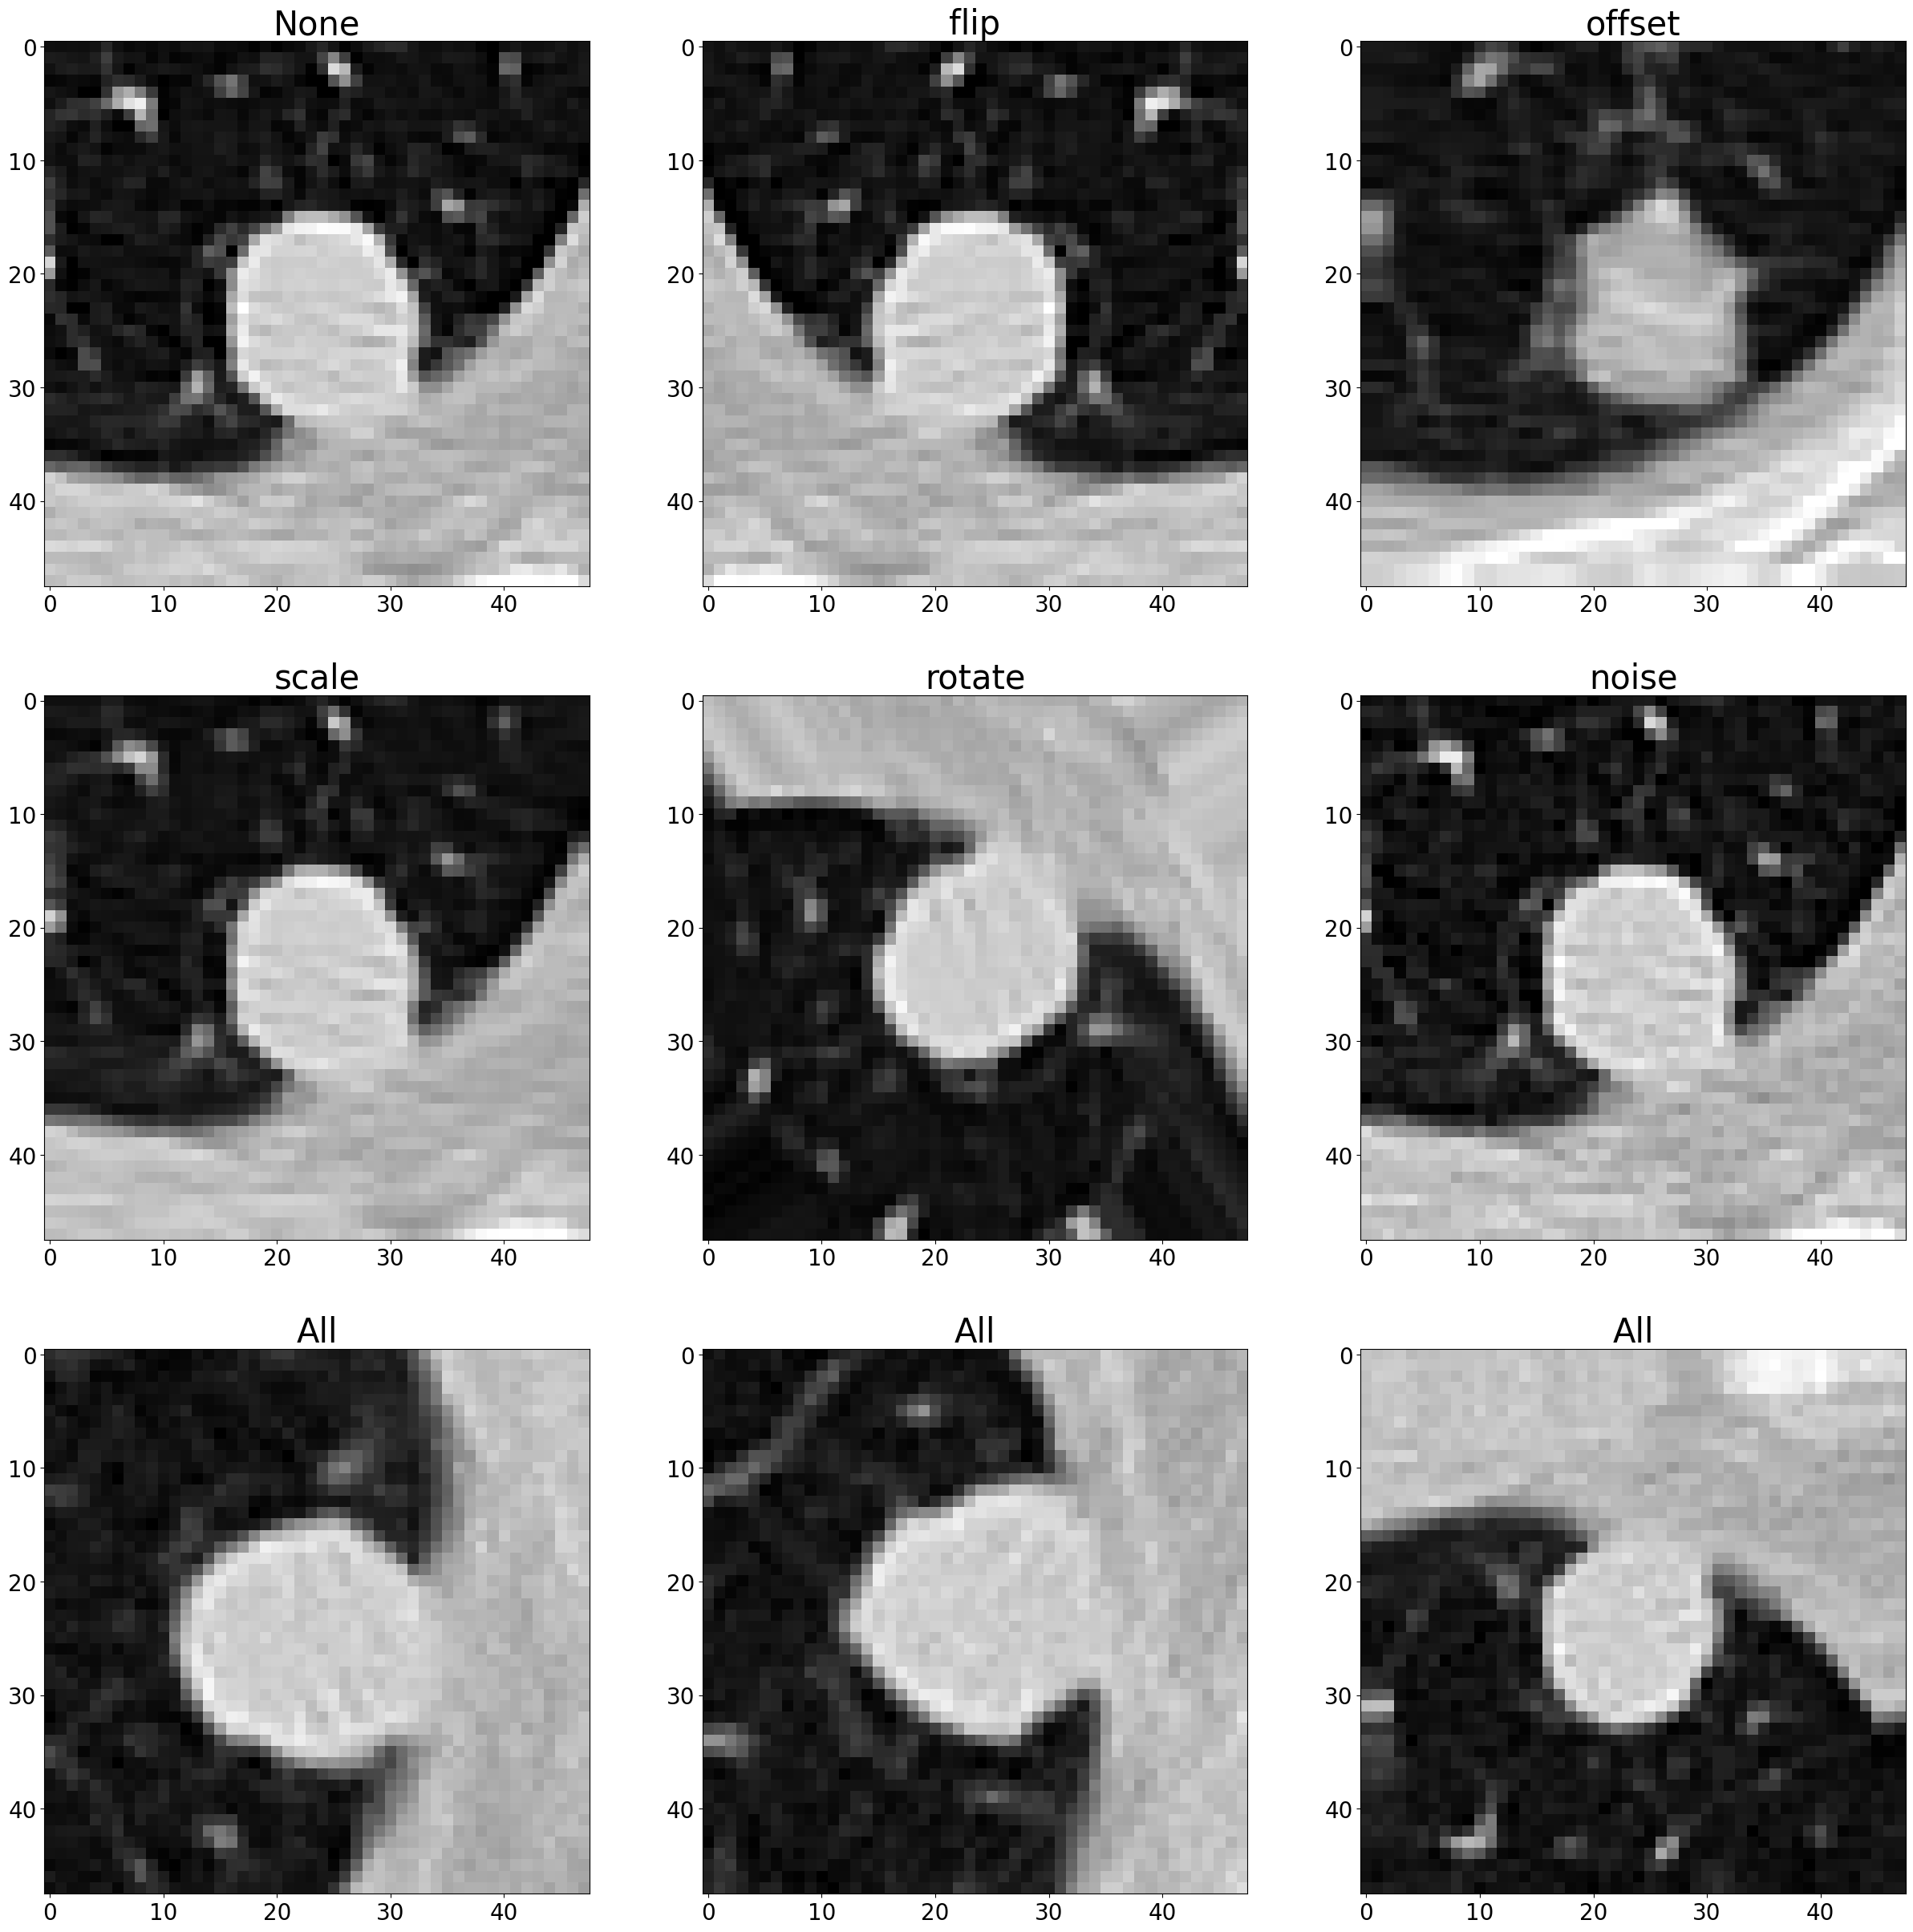

In [11]:
sample_ndx = 100
sample_ndx = 154
sample_ndx = 155


sample_tup = all_ds[sample_ndx]
print(sample_tup[0].shape, sample_tup[1:])

fig = plt.figure(figsize=(30, 30))

clim=(-1000.0, 300)

for i, ((title_str, _), ds) in enumerate(zip(augmentation_list, ds_list)):
    sample_tup = ds[sample_ndx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    plt.imshow(sample_tup[0][0][16], clim=clim, cmap='gray')



2024-05-31 22:27:04,861 INFO     pid:408 src.dsets:269:__init__ <src.dsets.LunaDataset object at 0x00000207EFF043A0>: 278 training samples, 270 neg, 8 pos, unbalanced ratio


1.3.6.1.4.1.14519.5.2.1.6279.6001.173106154739244262091404659845 23 False [23, 31, 48, 129, 171, 186, 221, 235]


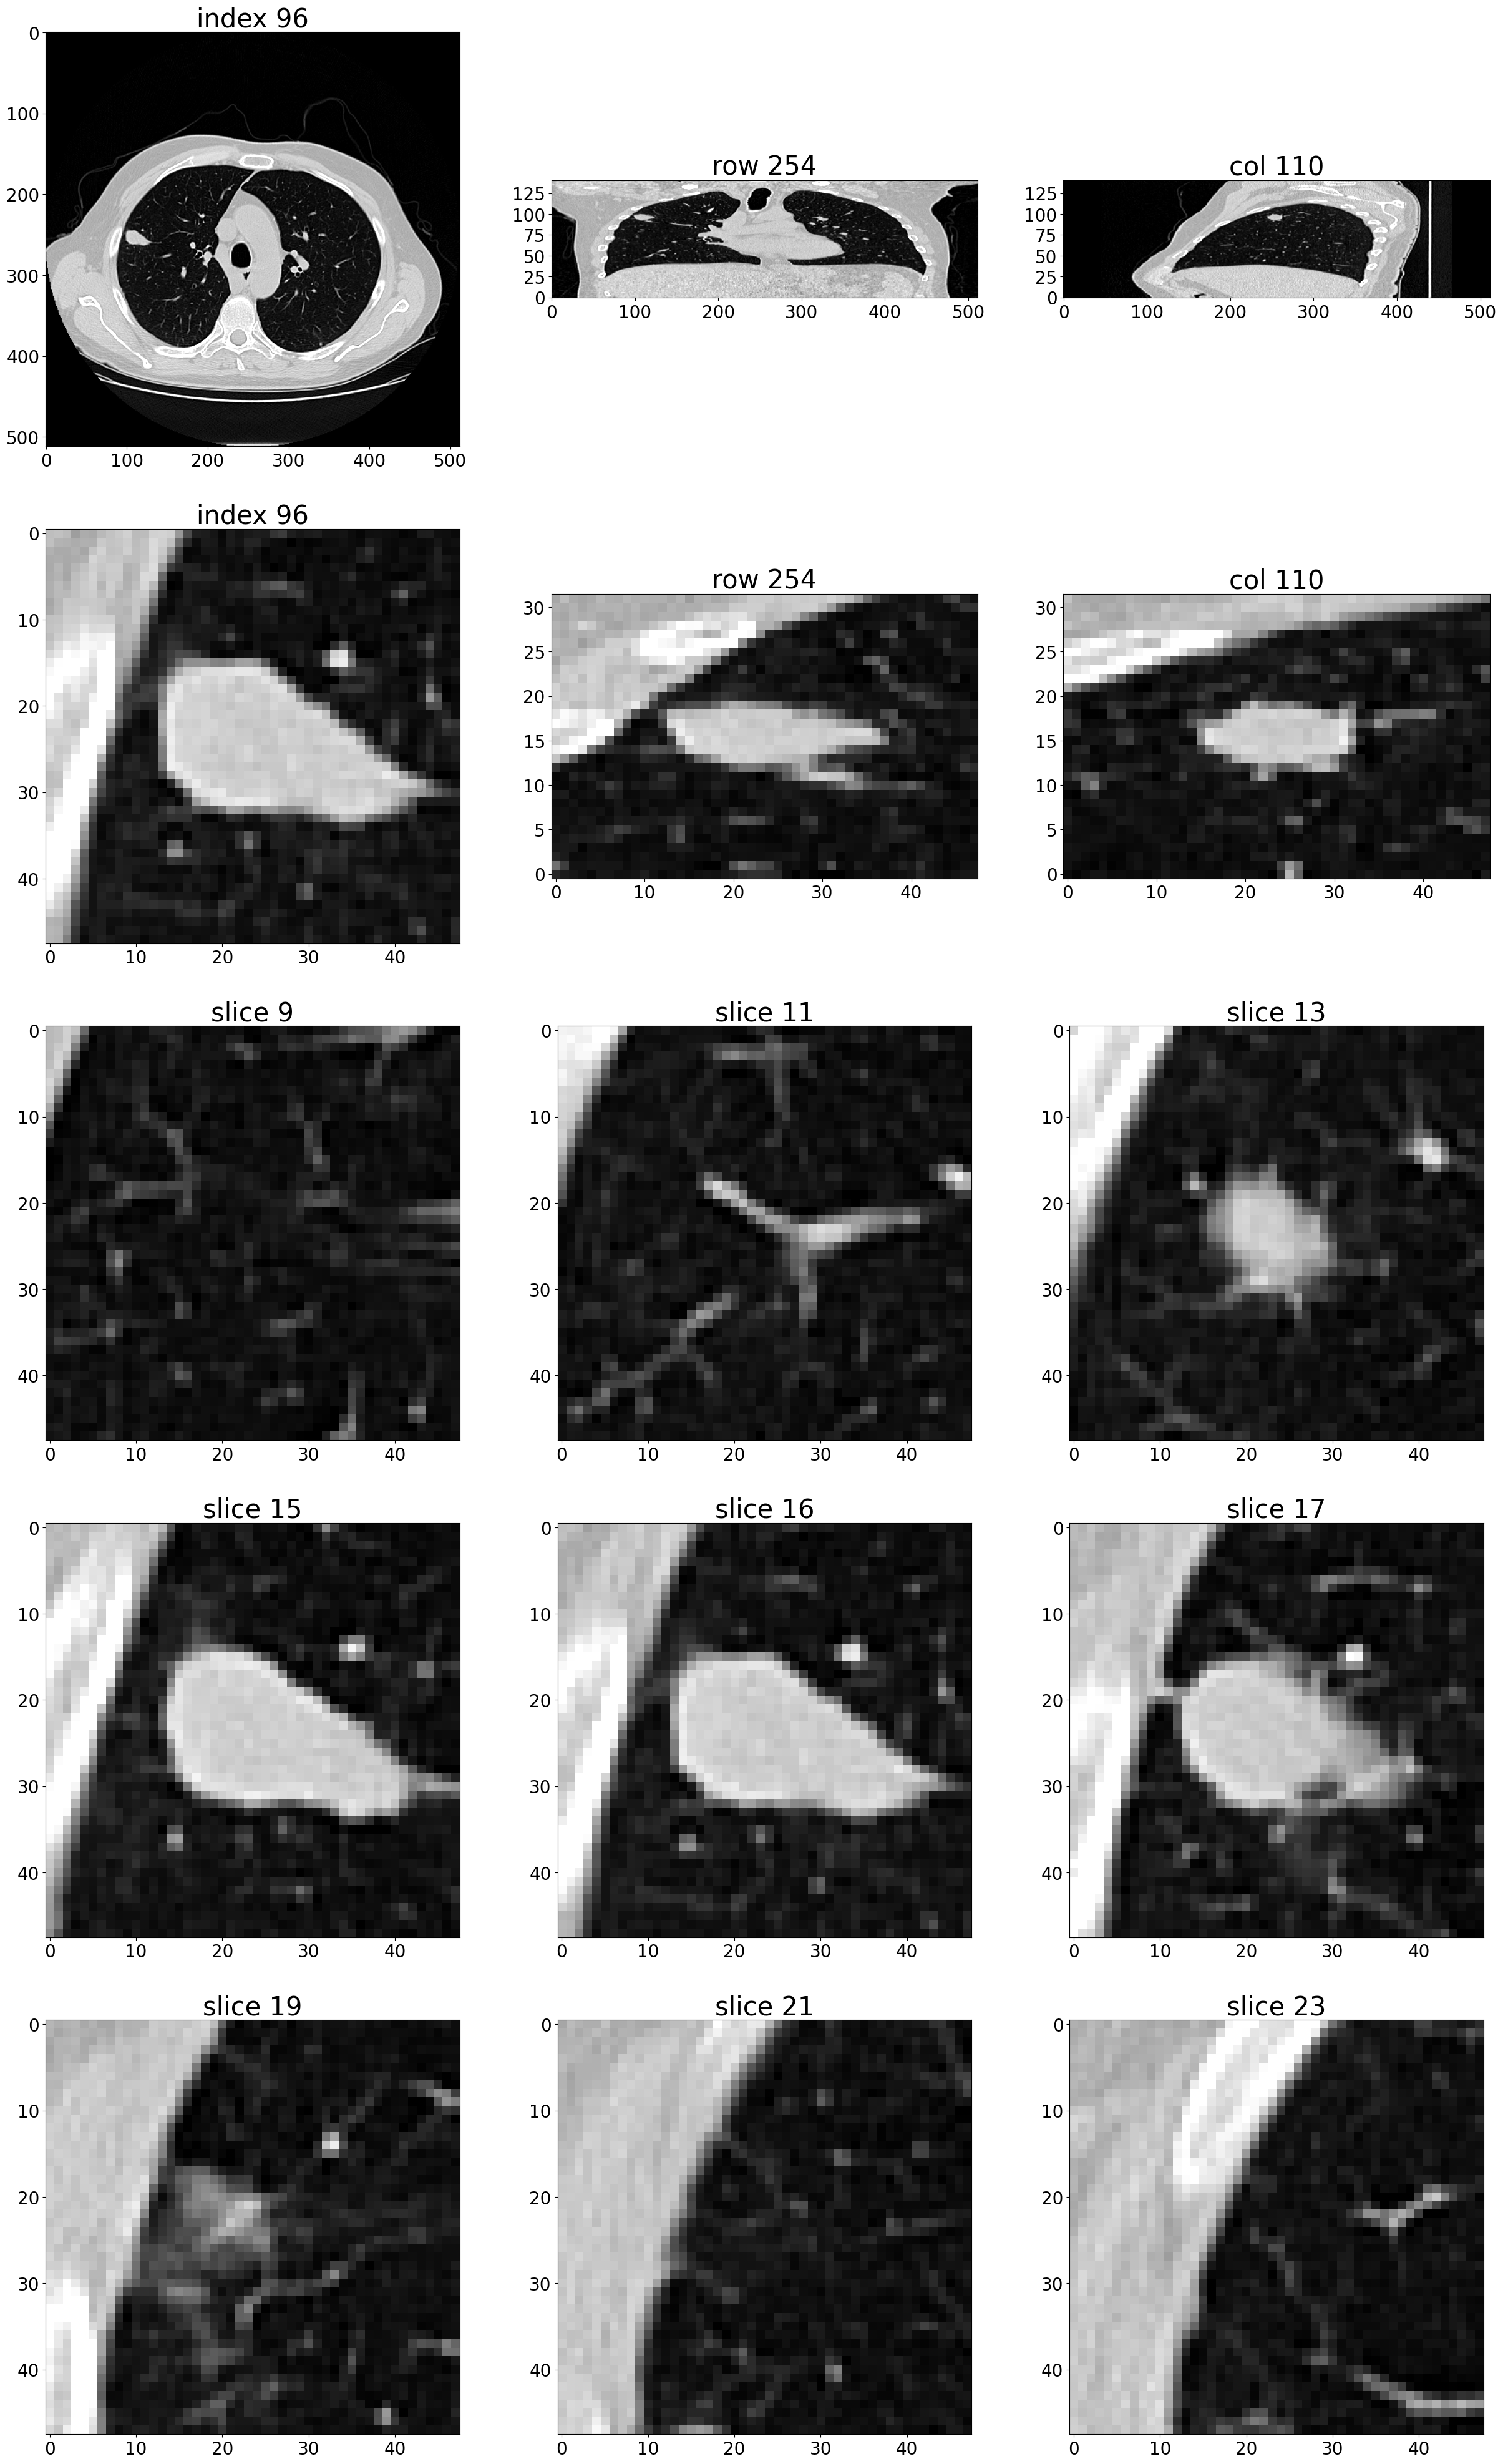

In [12]:
series_uid = positiveSample_list[1][2]
showCandidate(series_uid)